### Init

In [1]:
import warnings
warnings.filterwarnings('ignore')
%pylab inline
pylab.rcParams['figure.figsize'] = 12, 8

Populating the interactive namespace from numpy and matplotlib


In [2]:
import datetime
from itertools import chain

import matplotlib.dates as mdates

from IPython.display import HTML, Image, YouTubeVideo

### Formulas

In [3]:
def bmi2weight(height, heightUnit, bmi, weightUnit):
    if heightUnit == "ft":
        height *= 0.3048
    weightInKg = bmi * height**2
    if weightUnit == "lbs":
        weightInKg *= 2.20462262
    return weightInKg

### Data

In [4]:
series = """
2014-05-01 110.1
2014-05-07 108.0
2014-05-20 102.9
2014-06-12 101.2
"""
dateFormat = "%Y-%m-%d"
weightUnit = "Kg" # lbs

# bmi parameter
height = 1.78
heightUnit = "m" # ft

# plot
minY  = 80.0
maxY  = 130.0

# fit
future = 14 # days
goals  = [95, 92, 87] # enter your goals
#goals  = [b2w(25)]

# motivation
starEvery = 5
video = True

### Prepare data for plotting

In [5]:
raw = (line.rstrip().split(" ") for line in iter(series.splitlines()) if len(line.rstrip()) > 0)
interpreted = [(datetime.datetime.strptime(k, dateFormat), float(v)) for k, v in raw]
xData, yData = list(zip(*interpreted))
xFuture = tuple(xData[-1] + datetime.timedelta(days=i) for i in range(future))

### Statistics

In [6]:
s = []
w = s.append

diff = 0

if len(yData) > 1:
    days  = str(xData[-1] - xData[0])[:-9]
    weeks = float(days[:-5]) / float(7)
    w("Data recorded for <strong>{} ({:.0f} weeks)</strong><br />".format(days, weeks))    
    diff = yData[-1] - yData[-2]
    diffStart = yData[-1] - yData[0]
    diffPerWeek = diffStart / weeks
    w("Last difference: <strong>{} {}</strong><br />"
      "Total loss: <strong>{} {}</strong><br />"
      "Loss per Week: <strong>{} {}</strong><br />".format(round(diff, 2), weightUnit, 
                                                   round(diffStart, 2), weightUnit,
                                                   round(diffPerWeek, 2), weightUnit))
    
    w( "Stars ({} {} each):".format(starEvery, weightUnit))
    w("<table><tr>")
    for i in range(abs(int(diffStart / starEvery))):
        w("<td>")
        w("<img src=\"r-is-for-rocket.svg\" width=\"50px\"></img>")    
        w("</td>")
    w("</tr></table>")
else:
    w("Not enough data!")
    
h = HTML("\n".join(str(e) for e in s)); h

""


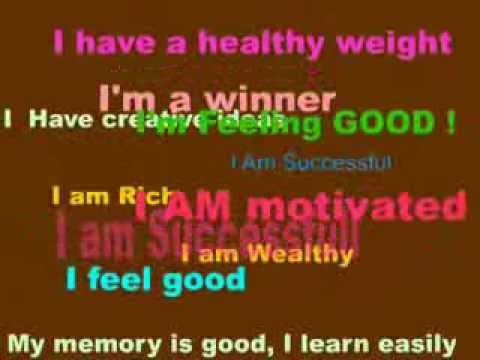

In [7]:
vid = '-0tp3n4opRI' if diff < 0 else "VlZRLkPXQqQ"
v = None
if video:
    v = YouTubeVideo(vid, autoplay=1, theme="light") 
v

### Plot data

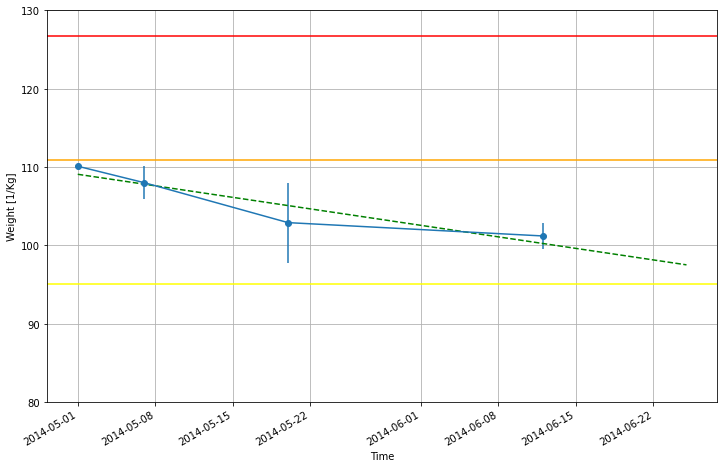

In [8]:
# errorbars for differences between measurements
yerr = list(chain([0],[(lambda v: 0 if v > 0 else v)(x - yData[i - 1]) for i, x in enumerate(yData) if i > 0]))
errorbar(xData, yData, yerr = yerr, fmt = 'o-', label = "")

# prepare fit
fit_x = mdates.date2num(xData)
fit = polyfit(fit_x, yData, 1)
fit_color = "red" if fit[0] > 0 else "green"
fit_fn = poly1d(fit)

# draw fit
fit_x_future = np.append(fit_x, mdates.date2num(xFuture))
plot(fit_x_future, fit_fn(fit_x_future), '--k',  color = fit_color, label = "")
ylabel("Weight [1/{}]".format(weightUnit))
xlabel("Time")
ylim(ymin=minY, ymax=maxY);

# draw bmi limits
b2w = lambda bmi: bmi2weight(height, heightUnit, bmi, weightUnit)
    
axhline(color='green',  y = b2w(25.0)) # limit normal
axhline(color='yellow', y = b2w(30.0)) # limit preadipositas
axhline(color='orange', y = b2w(35.0)) # limit adipositas_I
axhline(color='red',    y = b2w(40.0)) # limit adipositas_II

gcf().autofmt_xdate()
grid()


### Prognosis

In [9]:
fit_fn = poly1d(polyfit(yData, fit_x, 1)) 

s = []
w = s.append
w("<table>")
w("<tr>")
w("<th>Goal</th>")
w("<th>Prognosis</th>")
w("</tr>")

for goal in goals:
    w("<tr>")
    w("<td>")
    w(goal)
    w("</td>")
    w("<td>")
    target = mdates.num2date(fit_fn(goal))
    td = datetime.datetime.today()
    if datetime.datetime(td.year, td.month, td.day) <= datetime.datetime(target.year, target.month, target.day):
        w("<font color=\"purple\">")
        w(str(target)[:10])
        w("</font>")
    else:
        w("<font color=\"green\">")
        w(str(target)[:10])
        w("</font>")
    w("</td>")
    w("</tr>")

w("</table>")
h = HTML("\n".join(str(e) for e in s)); h


Goal,Prognosis
95,2014-06-30
92,2014-07-12
87,2014-08-02
